## sklearn.linear_model.Ridge (L1)
- alpha=1.0, *, fit_intercept=True, copy_X=True, max_iter=None, tol=0.0001, solver='auto', positive=False, random_state=None

In [29]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import Ridge, LinearRegression

alpha 0일 때, 5 fold의 평균 RMSE = 5.829
alpha 0.1일 때, 5 fold의 평균 RMSE = 5.788
alpha 1일 때, 5 fold의 평균 RMSE = 5.653
alpha 10일 때, 5 fold의 평균 RMSE = 5.518
alpha 100일 때, 5 fold의 평균 RMSE = 5.33


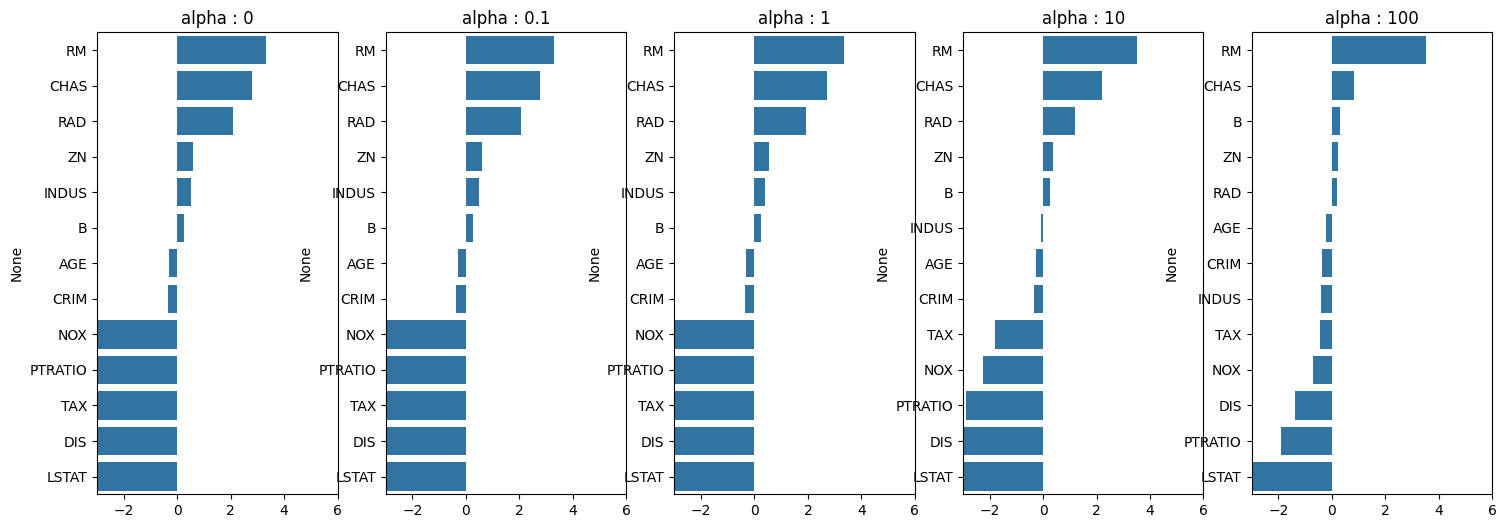

In [31]:
df = pd.read_csv('datasets/housing.csv' , header=None, names=['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']  , sep='\s+')
# 다중공선성을 안보는 이유 : 릿지를 활용했을 때 얼마나 작게 해줄 수 있는지 보기 위해
features = df.drop('MEDV' ,axis=1) 
label = df['MEDV']

X_train, X_test , y_train , y_test = train_test_split(features , label , test_size=0.2 , random_state=42)

scaler = RobustScaler()
scaler.fit(X_train)
scaled_X_train  = scaler.transform(X_train)
scaled_X_test  = scaler.transform(X_test)

rg_regressor = Ridge()
rg_regressor.fit(scaled_X_train, y_train)

alphas = [0, 0.1, 1, 10, 100]

for alpha in alphas :
    ridge = Ridge(alpha= alpha)

    neg_mse_scores = cross_val_score(ridge, features, label, scoring='neg_mean_squared_error', cv=5)
    avg_rmse = np.mean(np.sqrt(-1 * neg_mse_scores))

    print(f'alpha {alpha}일 때, 5 fold의 평균 RMSE = {round(avg_rmse, 3)}')


fig, axs = plt.subplots(figsize=(18,6), nrows=1, ncols=5)
coeff_df = pd.DataFrame()

for pos, alpha in enumerate(alphas) :
    ridge = Ridge(alpha = alpha)
    ridge.fit(scaled_X_train, y_train)

    coeff = pd.Series(data = ridge.coef_, index = features.columns)
    colname = 'alpha : ' + str(alpha)
    coeff_df[colname] = coeff

    coeff = coeff.sort_values(ascending=False) # 내림차순
    axs[pos].set_title(colname)
    axs[pos].set_xlim(-3,6)
    sns.barplot(x=coeff.values, y=coeff.index, ax=axs[pos])

plt.show()


In [11]:
# lr.coef_
# array([-0.35290689,  0.60220928,  0.52373794,  2.7844382 , -3.07927138,
#         3.31248077, -0.30285502, -4.79666938,  2.09943788, -4.12030629,
#        -3.11255122,  0.25051595, -4.88228567])


# rg_regressor.coef_ # 크기가 작아짐으로써 무력화 시킴을 알 수 있음
# array([-0.3504594 ,  0.56218619,  0.39932427,  2.72043738, -2.97415656,
#     3.34085697, -0.29900119, -4.66166703,  1.92758981, -3.63655469,
#    -3.08831153,  0.25215394, -4.84702453])

# rg_regressor = Ridge(alpha=100)
# rg_regressor.fit(scaled_X_train, y_train)
# rg_regressor.coef_
# array([-0.35774988,  0.23091374, -0.38609138,  0.81896758, -0.69637301,
#         3.51301318, -0.22316807, -1.35915668,  0.18179095, -0.45258887,
#        -1.9138125 ,  0.29564069, -3.09653531])

rg_regressor = Ridge(alpha=10) # 알파값이 작아질수록 수는 커짐
rg_regressor.fit(scaled_X_train, y_train)
rg_regressor.coef_
# array([-0.33878289,  0.37722143, -0.06445195,  2.19209844, -2.24928226,
#         3.5068176 , -0.27682434, -3.7509801 ,  1.19234956, -1.81139995,
#        -2.88176052,  0.26282732, -4.57086384])




array([-0.33878289,  0.37722143, -0.06445195,  2.19209844, -2.24928226,
        3.5068176 , -0.27682434, -3.7509801 ,  1.19234956, -1.81139995,
       -2.88176052,  0.26282732, -4.57086384])

In [19]:
X_train.columns


Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

In [21]:
scaled_X_train

array([[ 4.72910196e+00,  0.00000000e+00,  7.35543562e-01, ...,
         4.41176471e-01, -2.06212252e+00,  1.45677083e+00],
       [ 1.17250382e-01,  0.00000000e+00, -3.23824210e-02, ...,
         6.76470588e-01,  2.12744977e-01, -2.55729167e-01],
       [-7.26343694e-02,  1.75000000e+00, -1.92752506e-01, ...,
        -5.29411765e-01, -1.43251572e+00, -3.22395833e-01],
       ...,
       [-7.89293695e-02,  4.00000000e+00, -5.05011565e-01, ...,
        -5.00000000e-01, -1.79958092e-02, -5.14062500e-01],
       [ 3.49156582e+00,  0.00000000e+00,  7.35543562e-01, ...,
         4.41176471e-01, -1.38767410e+01,  1.28593750e+00],
       [-1.04532240e-02,  0.00000000e+00,  0.00000000e+00, ...,
         6.47058824e-01, -1.58020461e+01, -3.07291667e-02]])

## sklearn.linear_model.Lasso (L2)
- alpha=1.0, *, fit_intercept=True, precompute=False, copy_X=True, max_iter=1000, tol=0.0001, warm_start=False, positive=False, random_state=None, selection='cyclic'

##### 피쳐 선택에 유리 (+Tree)

/opt/homebrew/lib/python3.11/site-packages/sklearn/base.py:1474: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:678: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.967e+03, tolerance: 3.919e+00 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinat

alpha 0일 때, 5 fold의 평균 RMSE = 5.829
alpha 0.1일 때, 5 fold의 평균 RMSE = 5.615
alpha 1일 때, 5 fold의 평균 RMSE = 5.776
alpha 10일 때, 5 fold의 평균 RMSE = 6.586
alpha 100일 때, 5 fold의 평균 RMSE = 8.393


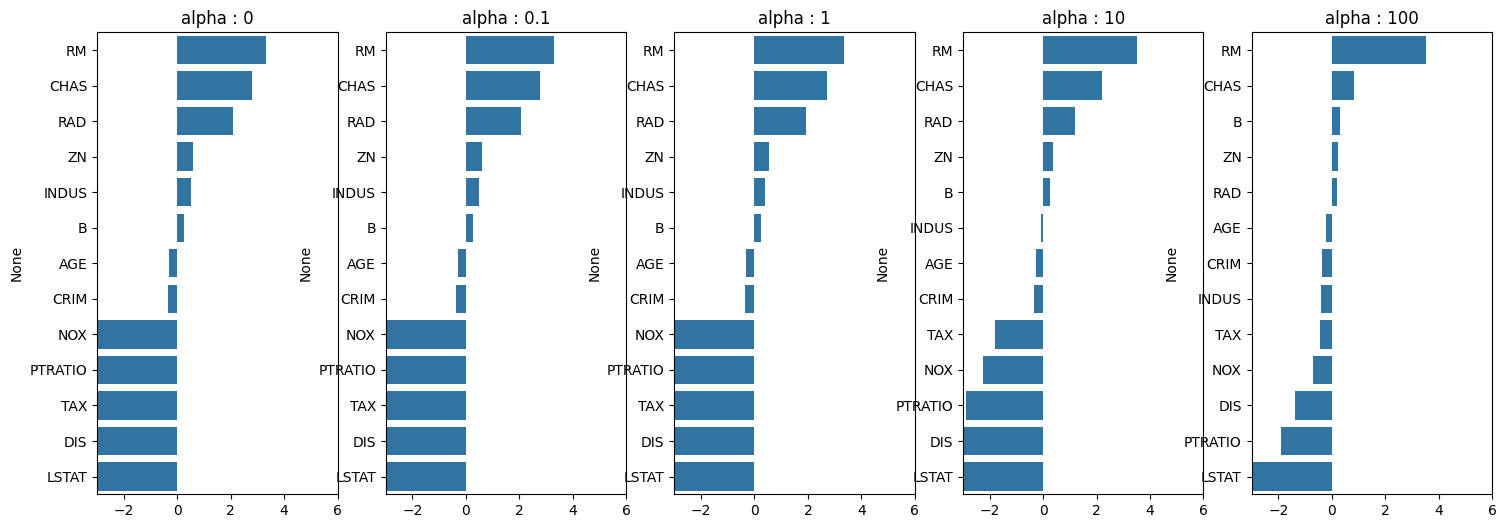

In [35]:
from sklearn.linear_model import Lasso

for alpha in alphas :
    lasso = Lasso(alpha= alpha)

    neg_mse_scores = cross_val_score(lasso, features, label, scoring='neg_mean_squared_error', cv=5)
    avg_rmse = np.mean(np.sqrt(-1 * neg_mse_scores))

    print(f'alpha {alpha}일 때, 5 fold의 평균 RMSE = {round(avg_rmse, 3)}')

fig, axs = plt.subplots(figsize=(18,6), nrows=1, ncols=5)
coeff_df = pd.DataFrame()

for pos, alpha in enumerate(alphas) :
    lasso = Ridge(alpha = alpha)
    lasso.fit(scaled_X_train, y_train)

    coeff = pd.Series(data = lasso.coef_, index = features.columns)
    colname = 'alpha : ' + str(alpha)
    coeff_df[colname] = coeff

    coeff = coeff.sort_values(ascending=False) # 내림차순
    axs[pos].set_title(colname)
    axs[pos].set_xlim(-3,6)
    sns.barplot(x=coeff.values, y=coeff.index, ax=axs[pos])

plt.show()


## sklearn.linear_model.ElasticNet (L1+L2)
- alpha=1.0, *, l1_ratio=0.5, fit_intercept=True, precompute=False, max_iter=1000, copy_X=True, tol=0.0001, warm_start=False, positive=False, random_state=None, selection='cyclic'

In [ ]:
from sklearn.linear_model import ElasticNet

for alpha in alphas :
    elasticnet = ElasticNet(alpha= alpha)

    neg_mse_scores = cross_val_score(elasticnet, features, label, scoring='neg_mean_squared_error', cv=5)
    avg_rmse = np.mean(np.sqrt(-1 * neg_mse_scores))

    print(f'alpha {alpha}일 때, 5 fold의 평균 RMSE = {round(avg_rmse, 3)}')

fig, axs = plt.subplots(figsize=(18,6), nrows=1, ncols=5)
coeff_df = pd.DataFrame()

for pos, alpha in enumerate(alphas) :
    elasticnet = Ridge(alpha = alpha)
    elasticnet.fit(scaled_X_train, y_train)

    coeff = pd.Series(data = elasticnet.coef_, index = features.columns)
    colname = 'alpha : ' + str(alpha)
    coeff_df[colname] = coeff

    coeff = coeff.sort_values(ascending=False) # 내림차순
    axs[pos].set_title(colname)
    axs[pos].set_xlim(-3,6)
    sns.barplot(x=coeff.values, y=coeff.index, ax=axs[pos])

plt.show()


# Regression
- 선형회귀만 적용 (비선형회귀는 다루지 않음)
- 회귀 계수값을 업데이트 하며 비용함수 값을 최소화 하는 값을 찾음 -> 경사하강법 이용
- 최적을 찾다보면 과적합 발생
- 해결하려면 다중 공선성을 제거(의무) , 피쳐개수 줄이기
- 규제를 주는 방법도 있음
- Lidge, Rasso, Elasticnet
- 효율은 lidge가 좋음
- rasso는 피쳐 셀렉에 좋음
- alpha값이 클수록 규제가 강해짐
- 너무 작으면 과소 적합 (대충 학습한다는 의미)

- decisiontree 이용 할 수 있음, random forest도 가능, knn(거리기반)
- 여러 모델을 사용하며 최적의 모델을 찾아내는 것이 목표

# classification
- decisiontree
- Logistic Regression : y=ax+b(회귀)를 분류할 때 사용